In [28]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings

In [29]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [30]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [31]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [32]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [33]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [34]:
# reindex, sodass keine Timestamp lücken vorhanden sind

start_date = WS100_rtu.index.min()
end_date = WS100_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS100_rtu = WS100_rtu.reindex(new_index)

start_date = WS300_rtu.index.min()
end_date = WS300_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS300_rtu = WS300_rtu.reindex(new_index)

start_date = Raine_rtu.index.min()
end_date = Raine_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
Raine_rtu = Raine_rtu.reindex(new_index)

start_date = L_pcp_rtu.index.min()
end_date = L_pcp_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=1), end=end_date, freq='min')
L_pcp_rtu = L_pcp_rtu.reindex(new_index)

start_date = lhg_rtu.index.min()
end_date = lhg_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=5) - datetime.timedelta(hours=1), end=end_date, freq='5min')
lhg_rtu = lhg_rtu.reindex(new_index)

In [35]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [36]:
Raine_rtu_1M = fct.resampleDf(Raine_rtu[['Niederschlagsmenge']], '1M', max_nan=1000000000)

lhg05_rtu_1M = fct.resampleDf(lhg_rtu[['lhg05']], '1M', max_nan=1000000000)
lhg07_rtu_1M = fct.resampleDf(lhg_rtu[['lhg07']], '1M', max_nan=1000000000)
lhg09_rtu_1M = fct.resampleDf(lhg_rtu[['lhg09']], '1M', max_nan=1000000000)
lhg10_rtu_1M = fct.resampleDf(lhg_rtu[['lhg10']], '1M', max_nan=1000000000)
lhg11_rtu_1M = fct.resampleDf(lhg_rtu[['lhg11']], '1M', max_nan=1000000000)

lhg09_rtu_1M_vergleich = lhg09_rtu_1M[lhg09_rtu_1M > 0]
lhg09_rtu_1M_vergleich = lhg09_rtu_1M_vergleich.dropna()

lhg11_rtu_1M_vergleich = lhg11_rtu_1M[lhg11_rtu_1M > 0]
lhg11_rtu_1M_vergleich = lhg11_rtu_1M_vergleich.dropna()

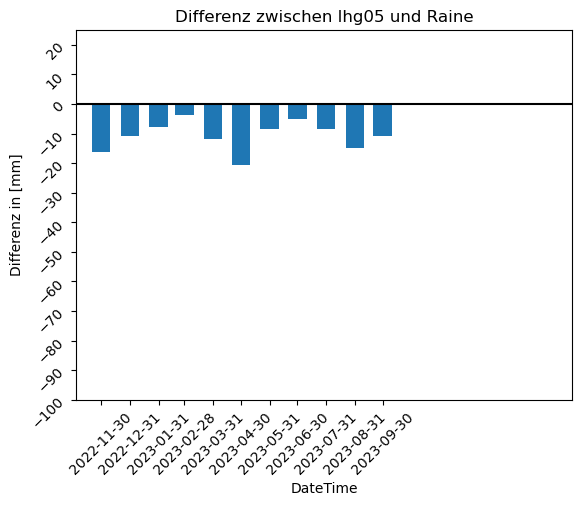

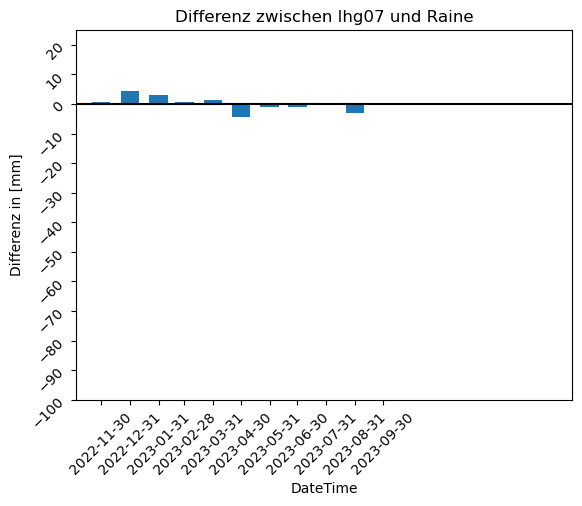

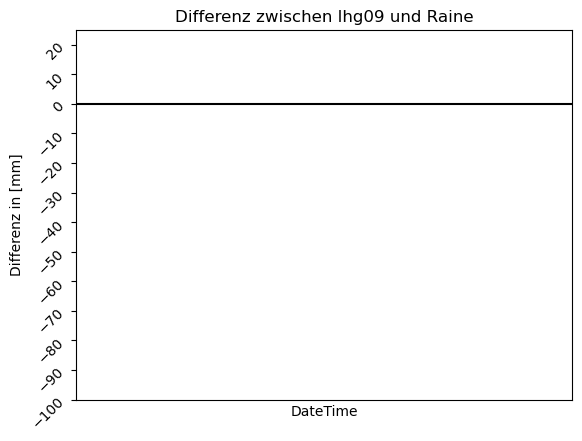

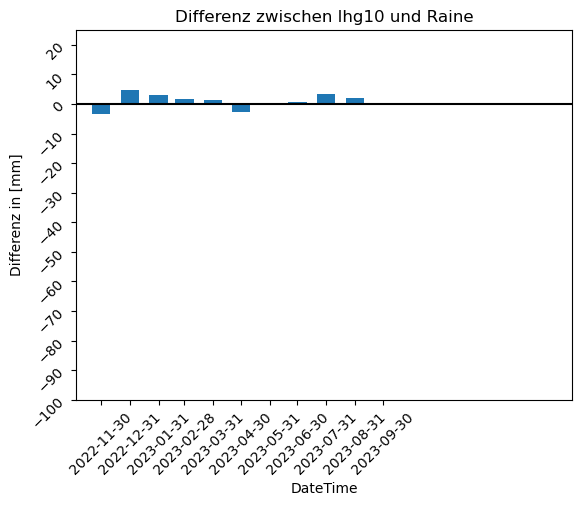

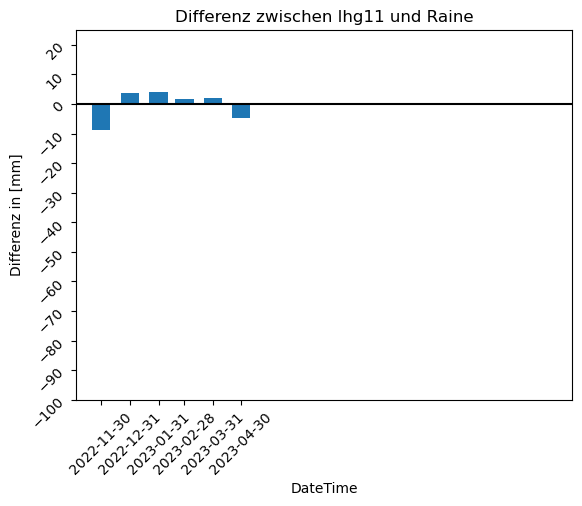

In [37]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[lhg05_rtu_1M['lhg05'], 'lhg05', 'Raine'],
                [lhg07_rtu_1M['lhg07'], 'lhg07', 'Raine'],
                [lhg09_rtu_1M_vergleich['lhg09'], 'lhg09', 'Raine'],
                [lhg10_rtu_1M['lhg10'], 'lhg10', 'Raine'],
                [lhg11_rtu_1M_vergleich['lhg11'], 'lhg11', 'Raine']]

for i in range(len(station_info)):

    index_gemeinsam = reference.index.intersection(station_info[i][0].index)

    list_difference = [] 
    list_difference_index = []

    for index in index_gemeinsam:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference[:-1]
    index_input = list_difference_index[:-1]

    fig, ax = plt.subplots()

    plt.hlines(0, pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00'), colors='black', linestyles='solid')

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
    
    ax.set_xlim([pd.to_datetime('2022-11-03 00:00:00'), pd.to_datetime('2024-04-22 00:00:00')])

    ax.set_ylim(-95, 25)
    ax.set_yticks(np.arange(-100, 30, 10))
    
    plt.yticks(rotation=45)

    plt.show()

In [38]:
WS100_rtu_1M = fct.resampleDf(WS100_rtu, '1M', max_nan=1000000000)
WS300_rtu_1M = fct.resampleDf(WS300_rtu, '1M', max_nan=1000000000)
L_pcp_rtu_1M = fct.resampleDf(L_pcp_rtu, '1M', max_nan=1000000000)

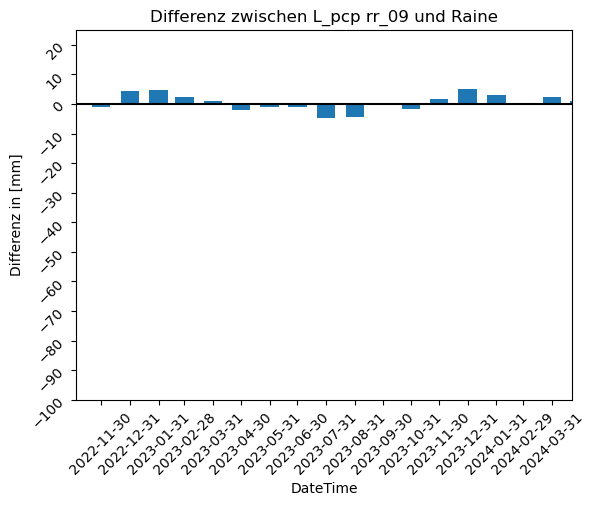

In [39]:
reference = Raine_rtu_1M['Niederschlagsmenge']

# station_info = [[WS100_rtu_1M['precipitation.1'], 'WS100', 'Raine'], 
#                 [WS300_rtu_1M['precipitation.1'], 'WS300', 'Raine'],
#                 [L_pcp_rtu_1M['rr_07'], 'L_pcp rr_07', 'Raine'],
#                 [L_pcp_rtu_1M['rr_09'], 'L_pcp rr_09', 'Raine'],
#                 [L_pcp_rtu_1M['rr_10'], 'L_pcp rr_10', 'Raine']]

station_info = [[L_pcp_rtu_1M['rr_09'], 'L_pcp rr_09', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    index_überschneidend = reference.index.intersection(station_info[i][0].index)

    for index in index_überschneidend:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots()
    
    plt.hlines(0, pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00'), colors='black', linestyles='solid')

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)

    ax.set_xlim([pd.to_datetime('2022-11-03 00:00:00'), pd.to_datetime('2024-04-22 00:00:00')])

    ax.set_ylim(-95, 25)
    ax.set_yticks(np.arange(-100, 30, 10))
        
    plt.yticks(rotation=45)

    plt.show()

In [40]:
print(index_überschneidend[0])
print(index_überschneidend[-1])

2022-11-30 00:00:00
2024-04-30 00:00:00


In [41]:
dif_ind = pd.DataFrame(data=list_difference, index=list_difference_index, columns=['Differenz'])

In [42]:
dif_ind

,Differenz
2022-11-30,-1.16
2022-12-31,4.48
2023-01-31,4.78
2023-02-28,2.33
2023-03-31,0.94
2023-04-30,-2.00
2023-05-31,-1.15
2023-06-30,-0.96
2023-07-31,-4.59
2023-08-31,-4.37


In [43]:
print(fct.calculate_correlation_with_without_resample(Raine_rtu_1M, L_pcp_rtu_1M, 'Niederschlagsmenge', 'rr_09', 0.99, False, False))

1.0
